In [31]:
# Dependencies
import requests
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import pprint
# Load JSON
filepath = os.path.join("Resources", "USDM.json")
with open(filepath) as jsonfile:
    json_data = json.load(jsonfile)
#json_data
url = "https://www.fire.ca.gov/umbraco/api/IncidentApi/List?"
incident_acres_burned = []
incident_latitude = []
incident_longitude = []
incident_start_timestamp = []
incident_county = []
incident_type = []
incident_start_date = []

start_year = 2000
end_year = 2023
counter = start_year

def json_find(year):
    add = f"year={year}&inactive=true"
    response = requests.get(url + add)
    data = response.json()
    return data

def parse_data(year):
    for response in range(len(year)):
        incident = year[response]
        AcresBurned = incident["AcresBurned"]
        latitude = incident["Latitude"]
        longitude = incident["Longitude"]
        timestamp = incident["Started"]
        county = incident["County"]
        types = incident["Type"]
        start_date = incident["StartedDateOnly"]
        if AcresBurned != None:
            if (longitude <= -110) & (longitude >= -130):
                if (latitude <= 43) & (latitude >= 32):
                    incident_acres_burned.append(AcresBurned)
                    incident_latitude.append(latitude)
                    incident_longitude.append(longitude)
                    incident_start_timestamp.append(timestamp)
                    incident_county.append(county)
                    incident_type.append(types)
                    incident_start_date.append(start_date)

while counter <= end_year:
    this_json = json_find(counter)
    parse_data(this_json)
    counter += 1
test = pd.DataFrame(data={'Acres Burned': incident_acres_burned, 'Latitude': incident_latitude, 
                          'Longitude': incident_longitude, 'Incident Start': incident_start_timestamp,
                          'County': incident_county, 'Cause Type': incident_type, "Start Date": incident_start_date,})
test.head()

,Acres Burned,Latitude,Longitude,Incident Start,County,Cause Type,Start Date
0,407.0,36.602575,-118.016510,2013-02-24T08:16:00Z,Inyo,,2013-02-24
1,30.0,34.288877,-116.941311,2013-04-20T17:30:00Z,San Bernardino,,2013-04-20
2,274.0,37.116295,-119.635004,2013-04-30T12:59:00Z,Madera,,2013-04-30
3,6896.0,40.190062,-121.595555,2013-05-01T09:12:00Z,Tehama,,2013-05-01
4,75.0,38.441792,-122.350844,2013-04-30T23:44:00Z,Napa,,2013-04-30


In [19]:
add = f"year=2022&inactive=true"
response = requests.get(url + add)
data = response.json()
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(data[0])

{'AcresBurned': 687.0,
 'AdminUnit': 'CAL FIRE San Benito Monterey Unit & Mid Coast Fire',
 'AdminUnitUrl': None,
 'AgencyNames': 'CAL FIRE, CAL OES, Mid Coast Fire Brigade, Big Sur Volunteer '
                'Fire Department, Monterey County Regional Fire District, '
                'North Monterey County Fire District, Monterey County '
                'Sheriff’s Office, California Highway Patrol, and California '
                'State Parks',
 'CalFireIncident': False,
 'ControlStatement': '<p>Offshore winds are expected along the Big Sur '
                     'Coastline Wednesday. The fire is in patrol status, with '
                     'engines in the area should the need arise. Crews '
                     'continue fire suppression repair. Damage inspection has '
                     'been completed.</p>',
 'County': 'Monterey',
 'ExtinguishedDate': '',
 'ExtinguishedDateOnly': '',
 'Final': True,
 'IsActive': False,
 'Latitude': 36.396461,
 'Location': 'Palo Colorado Canyon

In [30]:
mean = test.mean()
median = test.median()
print(f'Mean: {mean}')
print(f'Median: {median}')
test['Acres Burned'].describe().astype('int64')

Mean: Acres Burned     NaN
Latitude         NaN
Longitude        NaN
Incident Start   NaN
County           NaN
Cause Type       NaN
Start Date       NaN
dtype: float64
Median: Acres Burned     NaN
Latitude         NaN
Longitude        NaN
Incident Start   NaN
County           NaN
Cause Type       NaN
Start Date       NaN
dtype: float64


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [21]:
acres_burned_stat = test["Acres Burned"].describe()
acres_burned_stat

count    2.004000e+03
mean     5.193090e+03
std      4.005780e+04
min      0.000000e+00
25%      3.700000e+01
50%      1.005000e+02
75%      4.442500e+02
max      1.032648e+06
Name: Acres Burned, dtype: float64

In [22]:
 test["Acres Burned"].min()

0.0

In [23]:
 test["Acres Burned"].max()

1032648.0

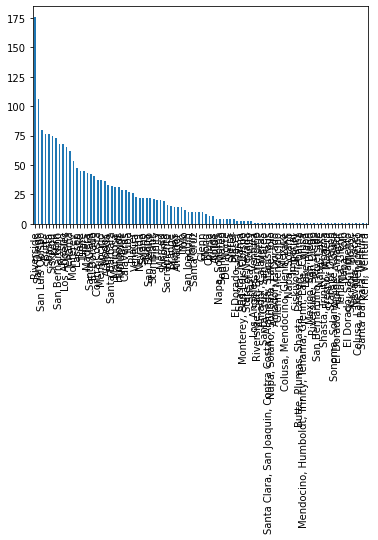

In [16]:
test["County"].value_counts().plot(kind='bar')

In [26]:
test['Year'] = pd.DatetimeIndex(test['Start Date']).year

In [27]:
test.head()

,Acres Burned,Latitude,Longitude,Incident Start,County,Cause Type,Start Date,Year
0,407.0,36.602575,-118.016510,2013-02-24T08:16:00Z,Inyo,,2013-02-24,2013
1,30.0,34.288877,-116.941311,2013-04-20T17:30:00Z,San Bernardino,,2013-04-20,2013
2,274.0,37.116295,-119.635004,2013-04-30T12:59:00Z,Madera,,2013-04-30,2013
3,6896.0,40.190062,-121.595555,2013-05-01T09:12:00Z,Tehama,,2013-05-01,2013
4,75.0,38.441792,-122.350844,2013-04-30T23:44:00Z,Napa,,2013-04-30,2013


In [ ]:
years = ["D0", "D1", "D2", "D3", "D4"]
counts = test["Year"].value_counts()
plt.bar(causes, counts, alpha=1, align = "center")
plt.xlabel("Drought Level")
plt.ylabel("Drought Level Counts")
plt.title("Number of Cases Per Drought Level From Year 2000 to 2023")

In [28]:
test["Year"].value_counts()

2013    141
Name: Year, dtype: int64